# Exploratory Analysis: Fatal Police Shootings in the United States

## Dataset Information

There has been increased scrutiny on police accountability and enforcement, in the wake of fatal shootings by police officers. As we work together as a country to build solutions that will improve this situation, it is important to collect reliable data and identify actionable trends.

This dataset was found on Kaggle, but is initially from a database compiled by the Washington Post. WP started compiling this database of every fatal shooting by a police officer since 2015, primarily in an effort to improve visibility on police accountability and to work towards reliable reporting of these cases.

The data itself was collected from the WP through information gathered from law enforcement websites, local new reports, social media, and independent databases. Kaggle also share additional census data that can be appended, but we won't focus on that for this analysis.

I picked this dataset because even though it was last updated a year ago, this continues to be a pressing issue in the United States that has crossed political, racial, and ideological lines. 

Link to dataset: https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us

## Initial Data Exploration

### Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### Check for missing values

In [16]:
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [23]:
data.shape

(2535, 14)

Seems that we have NA values in the 'armed', 'age', 'race', and 'flee' variables. 

We'll go through each characteristic variable and check to see if there are any erroneous values.

In [22]:
data['manner_of_death'].value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

In [25]:
data['armed'].value_counts()

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
toy weapon                           104
unknown weapon                        18
machete                               18
Taser                                  9
ax                                     9
baseball bat                           8
sword                                  8
box cutter                             7
metal pipe                             7
hammer                                 7
crossbow                               6
hatchet                                6
gun and knife                          5
screwdriver                            5
blunt object                           5
guns and explosives                    3
scissors                               3
metal stick                            3
rock                                   3
metal object    

In [27]:
data['gender'].value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [28]:
data['signs_of_mental_illness'].value_counts()

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [29]:
data['threat_level'].value_counts()

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

In [30]:
data['flee'].value_counts()

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

In [31]:
data['body_camera'].value_counts()

False    2264
True      271
Name: body_camera, dtype: int64

In [32]:
data['race'].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Doesn't seem to be any other erroenous values in this dataset, so we just have to deal with the NaN (missing) values.

Usually, if we are building a model or completing a larger analysis, we would think further about how we deal with these values. For now, we will exclude them from our analysis.

In [35]:
data = data.dropna()
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [36]:
data.shape

(2254, 14)

We excluded 281 observations containing a NaN value, so we are left with 2254 observations

## Visualization

Since race is a primary talking point in this issue, we'll start by visualizing the races of the victims.

Text(0.5,1,'Race of Victims')

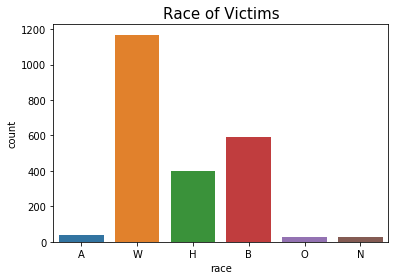

In [52]:
sns.countplot(data=data, x='race')
plt.title('Race of Victims',color = 'black',fontsize=15)

From the data dictionary, we know that 'W': White, 'H': Hispanic, and 'B': Black. 

With this knowledge, we can see that the majority of the victims were white, followed by black and then hispanic.

We can build similar plots for the other features.

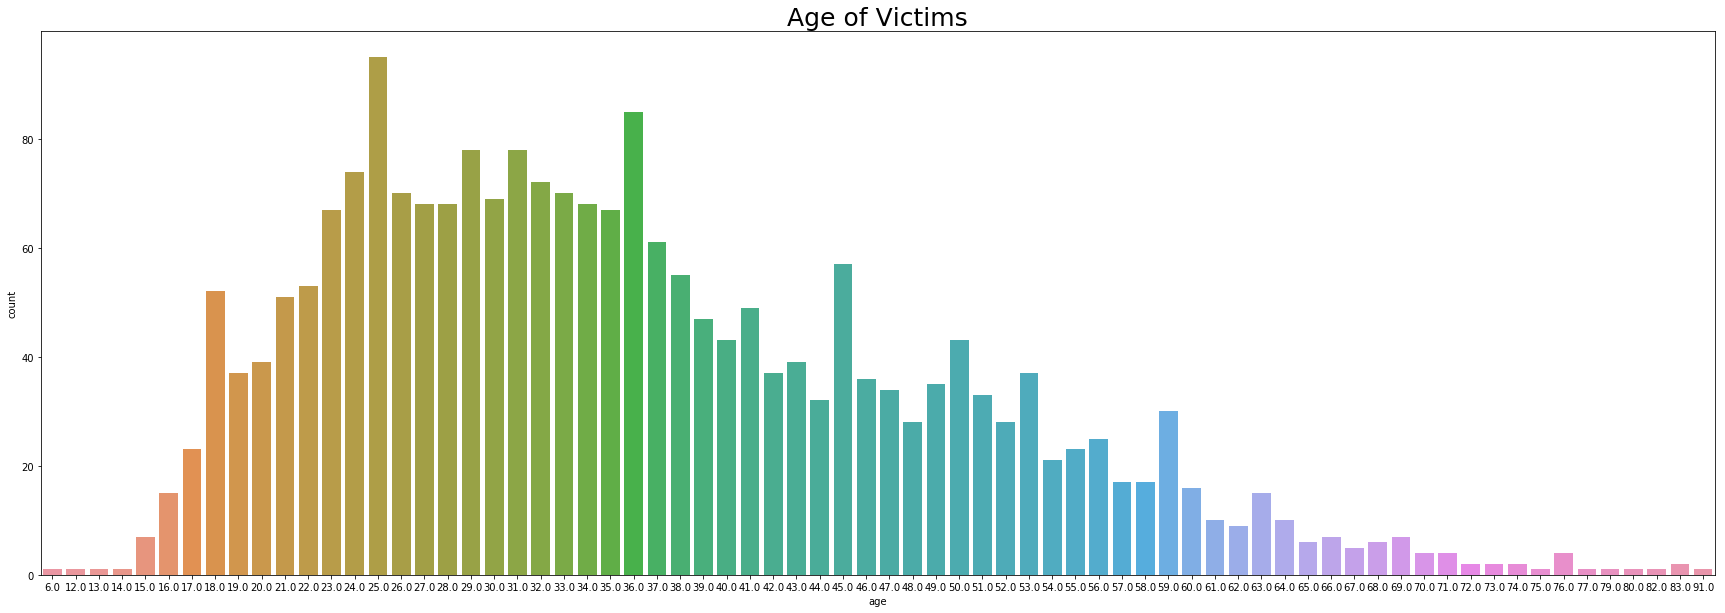

In [53]:
sns.countplot(data=data, x='age')
plt.title('Age of Victims',color = 'black',fontsize=25)
plt.gcf().set_size_inches(30, 10)

From this plot, we see that the majority of the victims were between the ages of 20 and 40. 

Text(0.5,1,'Gender of Victims')

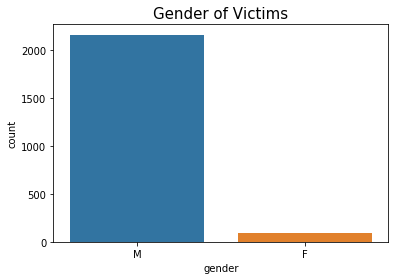

In [56]:
sns.countplot(data=data, x='gender')
plt.title('Gender of Victims',color = 'black',fontsize=15)

The vast majority of the victims were male.

Text(0.5,1,'Manner of Death of Victims')

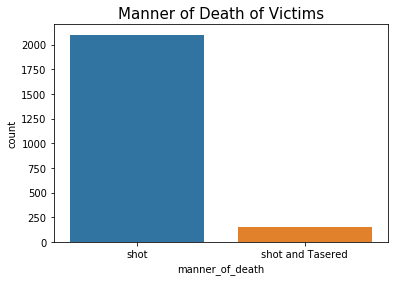

In [54]:
sns.countplot(data=data, x='manner_of_death')
plt.title('Manner of Death of Victims',color = 'black',fontsize=15)

Text(0.5,1,'Mental Health Illness Signs Present in Victims')

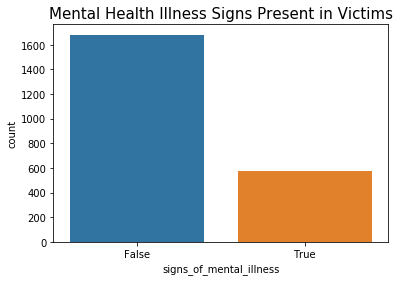

In [57]:
sns.countplot(data=data, x='signs_of_mental_illness')
plt.title('Mental Health Illness Signs Present in Victims',color = 'black',fontsize=15)

In [31]:
data['signs_of_mental_illness'].value_counts()

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

While there is a higher proportion of our victims that didn't present signs of mental illness, there is still a disturbingly high number that did present signs. We do not know how this specific variable was calculated, but mental health continues to be an area that needs further research, especially as it relates to crime.

Text(0.5,1,'Officer Wearing Body Camera')

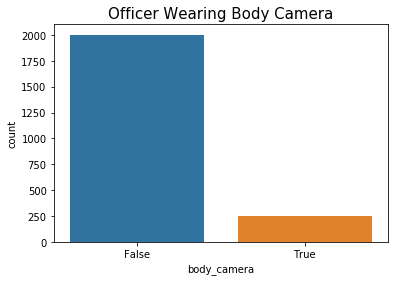

In [60]:
sns.countplot(data=data, x='body_camera')
plt.title('Officer Wearing Body Camera',color = 'black',fontsize=15)

As these fatal shootings came into public view, the Obama administration knew that they had to do something to increaes accountability. They committed over $23 milliion to 32 different police departments for a body camera pilot in 2015 (https://www.justice.gov/opa/pr/justice-department-awards-over-23-million-funding-body-worn-camera-pilot-program-support-law). 

Looking at the fatality data, can we see the effect of this program? Let's look at the body camera usage by year.

In [3]:
data['year'] = pd.DatetimeIndex(data['date']).year

In [6]:
bodycam_years = data.groupby(['year', 'body_camera']).agg({'body_camera': ['count']})
bodycam_years = bodycam_years.reset_index()
bodycam_years.head()

year body_camera      
                    count
0  2015       False   917
1  2015        True    74
2  2016       False   825
3  2016        True   138
4  2017       False   522

We don't see any offiers with bodycams during the year of 2017; this could be true, or could be a data issue, but we will focus on 2015 and 2016 for now. 

We can create a new variable that is the percentage of officers in our dataset that wore a body camera, and see if this percentage increases from 2015 to 2016.

In [22]:
col_names =  ['Year', 'Bodycam Percentage']
index = (0,1)
bodycam_df = pd.DataFrame([[2015, (74/(74+917)) * 100], [2016, (138/(138+825)) * 100]], columns= col_names)
bodycam_df.head()

,Year,Bodycam Percentage
0,2015,7.467205
1,2016,14.330218


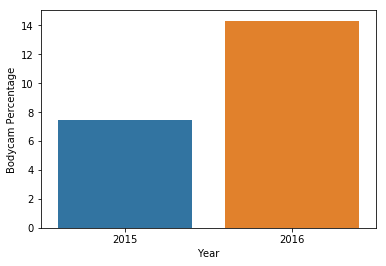

In [24]:
sns.barplot(x= 'Year', y= 'Bodycam Percentage', data=bodycam_df)

From 2015 to 2016, we see that the percentage of officers wearing bodycams in fatal shootings almost doubled (7.46% -> 14.33%), which could be a sign of the Obama pilot. However, we do not see any officers wearing bodycams in fatal shootings in 2017, which is worth looking into further.

Finally, we can look at the geographic distribution of the fatalities in our dataset.

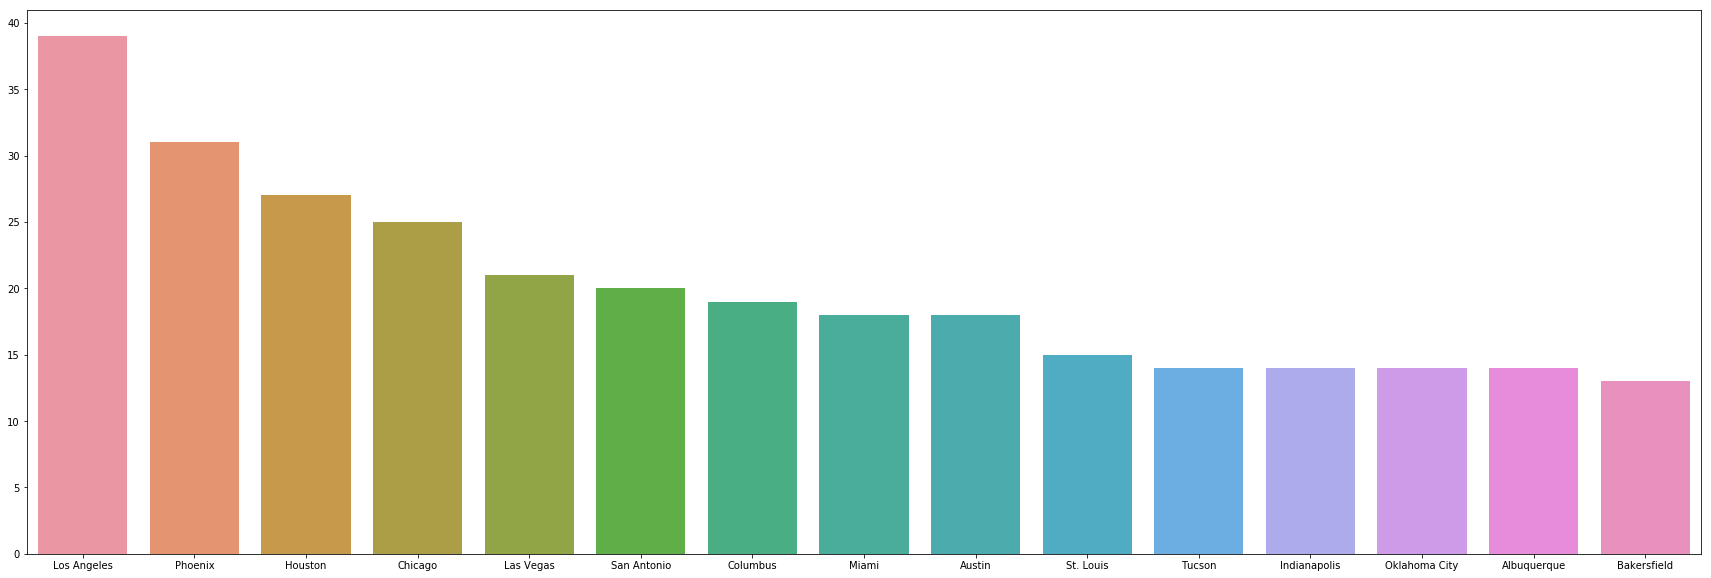

In [30]:
sns.barplot(x=city[:15].index,y=city[:15].values)
plt.gcf().set_size_inches(30, 10)

The majority of the fatalities are ocurring in Los Angeles, with Phoenix and Houston being the next most frequent cities

## Conclusion

Overall, we were able to explore this dataset and find some interesting patterns. Mental Illness, Body Cam usage, and Geography in particular could warrant further investigation. 

### Mental Illness: 

In our analysis, we found that there was a high number of victims that showed signs of mental illness (633/2505, or about 25% of the victims in our dataset), which lines up with research being done around how mental illness can be a primary driver for criminal behavior. If we are able to investigate this further, perhaps we could help these individuals and prevent these crimes before they happen. 

#### Questions for Future Analysis

How was this field calculated? Is there a way to overlay this data alongside known public health metrics for mental health and identify areas of opportunity for community outreach, preventing these incidents from escalating?

### Body Cam Usage
There was a public cry for police officers to wear body cameras after witness phone videos were shared on the internet, highlighting the need for accountability and repurcussions. The Obama pilot was a start towards this, and while we found in our analysis that body cam usage did almost double (7.46% -> 14.33%), we must also keep in mind the limitations of the data. We do not see any police officers in 2017 that were involved in a fatal incident that were wearing a body camera, and there are several confounding factors in play here. Is it that police officers are not wearing/are wearing more body cameras, or is it that specifically the police officers **involved in fatal incidents** are wearing/not wearing more body cameras? It is hard to tell. 


#### Questions for Future Analysis

Did the Obama pilot effectively improve accountability? And does body cam utility cause police officers to be less likely to be involved in fatal incidents? These are large questions that are continuing to be researched.


### Geography

We were able to identify the cities that had the highest number of fatal incidents (Los Angeles, Phoenix, Houston), but there is still a need to get more granular. Identifying larger scale geographic trends can help to find police departments where more training might be required, or communities where additional resources can be allocated.

#### Questions for Future Analysis

What steps are LAPD taking to improve their community, seeing that Los Angeles has the highest number of police-related fatalities? What are the social, economic, and cultural factors that might be influencing this statistic?
